In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(color_codes=True)
df = pd.read_csv("./report.csv")
df_edges = pd.read_csv("./edges.csv")

In [14]:
df_edges

,v,e
0,10,17
1,11,19
2,12,21
3,13,23
4,14,25
...,...,...
446,960000,1919997
447,970000,1939997
448,980000,1959997
449,990000,1979997


In [15]:
df['v'] = df['command'].apply(lambda x: int(x.split()[2][2:-4]))
df_joined = df.join(df_edges.set_index('v'), on='v')
df_joined['v_plus_e'] = df_joined['v'] + df_joined['e']

In [16]:
df_joined

,command,mean,stddev,median,user,system,min,max,v,e,v_plus_e
0,./main < ./190.txt,0.001123,0.000448,0.000882,0.000944,0.000345,0.000647,0.003083,190,376,566
1,./main < ./17000.txt,0.004831,0.000827,0.004682,0.004229,0.000685,0.003810,0.007488,17000,33997,50997
2,./main < ./58000.txt,0.013059,0.000820,0.012863,0.011918,0.001177,0.011750,0.015843,58000,115997,173997
3,./main < ./45000.txt,0.009821,0.000953,0.009627,0.008845,0.001049,0.008470,0.012819,45000,89997,134997
4,./main < ./9300.txt,0.002957,0.000834,0.002529,0.002503,0.000559,0.002182,0.006094,9300,18597,27897
...,...,...,...,...,...,...,...,...,...,...,...
446,./main < ./1000000.txt,0.225620,0.005746,0.223562,0.215991,0.009425,0.219986,0.250814,1000000,1999997,2999997
447,./main < ./1800.txt,0.001502,0.000564,0.001201,0.001279,0.000377,0.000967,0.003896,1800,3597,5397
448,./main < ./720.txt,0.001198,0.000472,0.000944,0.001026,0.000337,0.000792,0.003160,720,1437,2157
449,./main < ./740.txt,0.001216,0.000500,0.000940,0.001032,0.000349,0.000792,0.003553,740,1477,2217


In [17]:
from scipy import stats
r_value_n = stats.linregress(df_joined['v'], df_joined['mean'])[2]

r_value_n**2

0.9963389267341167

Text(0.5, 1.0, 'Complexidade Temporal do Problema')

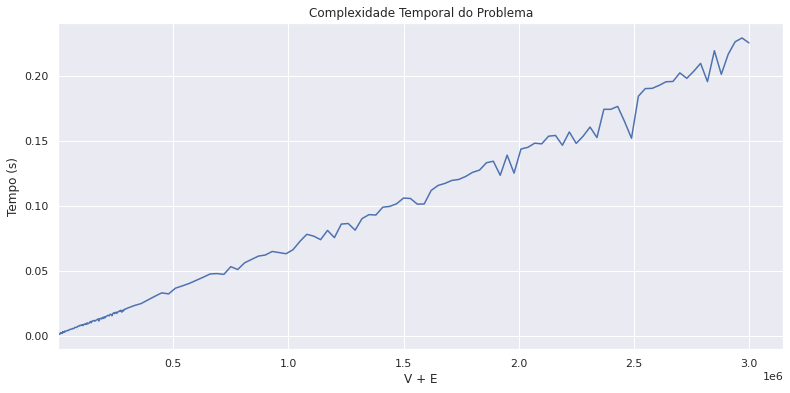

In [18]:
plt.figure(figsize=(13, 6))
ax = sns.lineplot(x="v_plus_e", y="mean", data=df_joined, err_style="bars", ci="sd")
ax.set_xlim(left=10)
ax.set_xlabel("V + E")
ax.set_ylabel("Tempo (s)")
#ax.set_xscale("function", functions=(lambda x: x * np.log10(x), lambda x: x))
plt.title("Complexidade Temporal do Problema")